# HEART DISEASE DIAGNOSIS 
The data here gives a medical profile of heart related tests for different patients. It can be used to predict if a person would have a disease or not using a classification model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Total number of People with and without disease

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

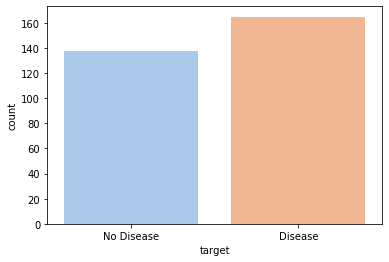

In [8]:
ax=sns.countplot(x="target", data=df, palette="pastel")
ax.set_xticklabels(['No Disease', 'Disease'])
plt.show()

## Number of Men and Woman with disease

In [9]:
count_disease = len(df[df["target"]==1])
count_nodisease = len(df[df["target"]==0])
total = (count_disease + count_nodisease)
perc1 = (count_disease/total)*100
perc2 = (count_nodisease/total)*100

print("Percentage of people with Heart Diseases: {:.2f}%".format(perc1))
print("Percentage of people with no Heart Diseases: {:.2f}%".format(perc2))

Percentage of people with Heart Diseases: 54.46%
Percentage of people with no Heart Diseases: 45.54%


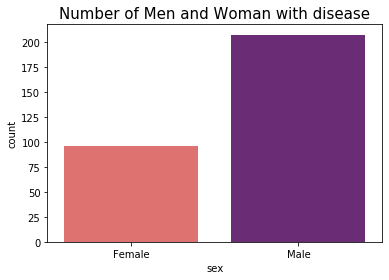

In [10]:
ax2 = sns.countplot(x='sex', data=df, palette="magma_r")
ax2.set_xticklabels(['Female', 'Male'])
plt.title("Number of Men and Woman with disease", fontsize=15)
plt.show()

## Percentage of Men and Women with disease

In [11]:
m_disease = len(df[df["sex"] == 1])
f_disease = len(df[df["sex"] == 0])
total = (m_disease + f_disease)
perc1 = (f_disease/total)*100
perc2 = (m_disease/total)*100

print("Percentage of Female with Heart Diseases: {:.2f}%".format(perc1))
print("Percentage of Male with Heart Diseases: {:.2f}%".format(perc2))

Percentage of Female with Heart Diseases: 31.68%
Percentage of Male with Heart Diseases: 68.32%


## Heart disease frequency according to age

In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


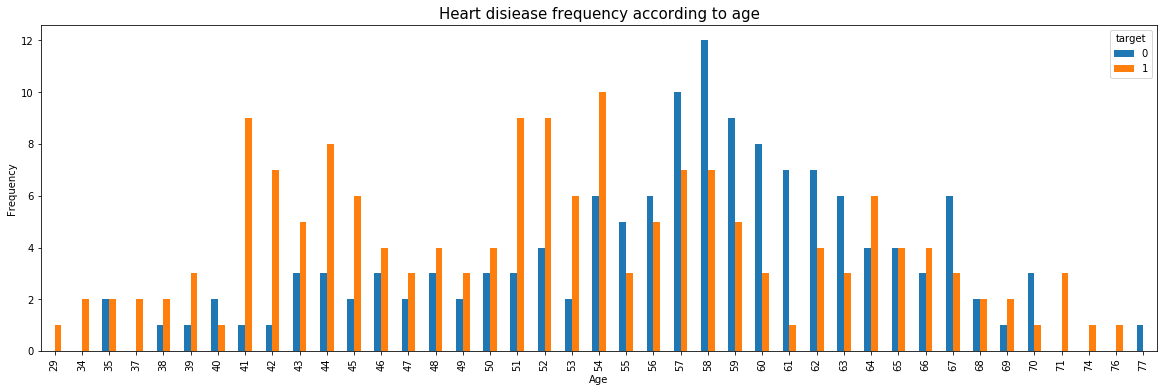

In [13]:
ct=pd.crosstab(df.age,df.target)
ct.plot(kind="bar",figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel('Age')
plt.title("Heart disiease frequency according to age", fontsize=15)
plt.savefig('heartDiseaseAndAges.png')
plt.show()

## Heart disease frequency according to sex

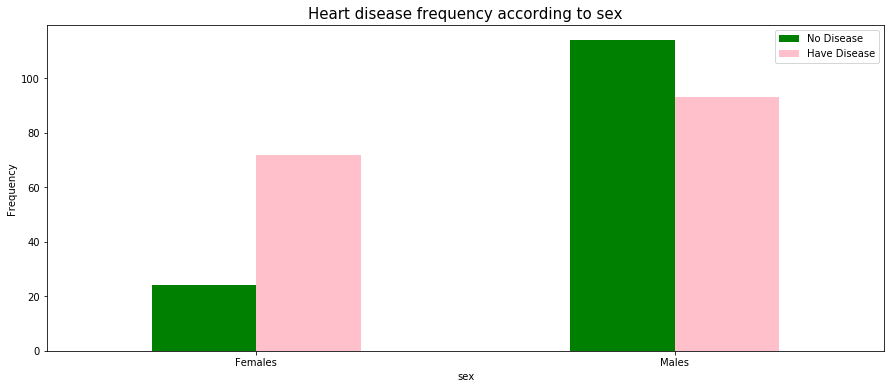

In [14]:
ct=pd.crosstab(df.sex,df.target)
ct.plot(kind="bar",figsize=(15,6),color=['green','pink'])
plt.title("Heart disease frequency according to sex", fontsize=15)
plt.xticks(rotation="horizontal")
plt.ylabel("Frequency")
plt.xticks([0,1],["Females", "Males"])
plt.legend(["No Disease", "Have Disease"])
plt.show()

## Heart Disease Frequency for Slope

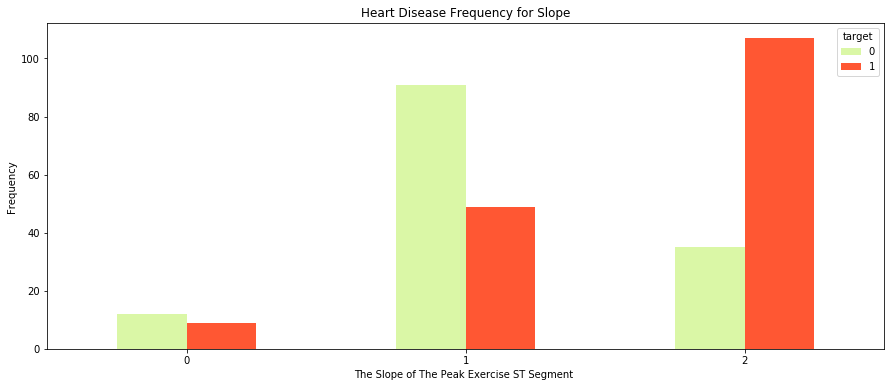

In [15]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## Heart Disease Frequency According To Fasting Blood Sugar(FBS)

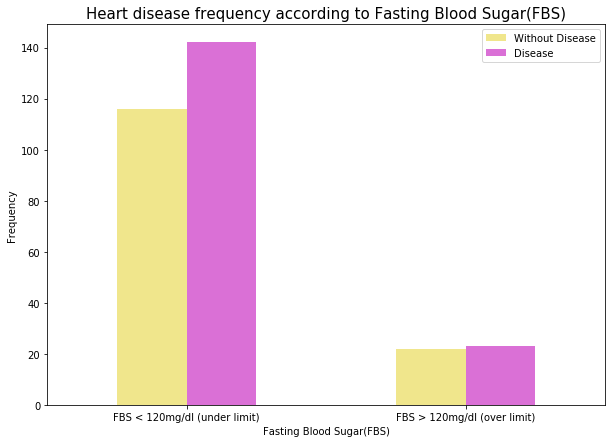

In [16]:
ct = pd.crosstab(df.fbs, df.target)
ct.plot(kind="bar", figsize=(10,7), color=['khaki','orchid'])
plt.title("Heart disease frequency according to Fasting Blood Sugar(FBS)",fontsize=15)
plt.xticks(rotation="horizontal")
plt.ylabel("Frequency")
plt.xlabel("Fasting Blood Sugar(FBS)")
plt.xticks([0,1],["FBS < 120mg/dl (under limit)", "FBS > 120mg/dl (over limit)"])
plt.legend(["Without Disease", "Disease"],)
plt.show()

## Heart Disease Frequency According To Chest Pain Type

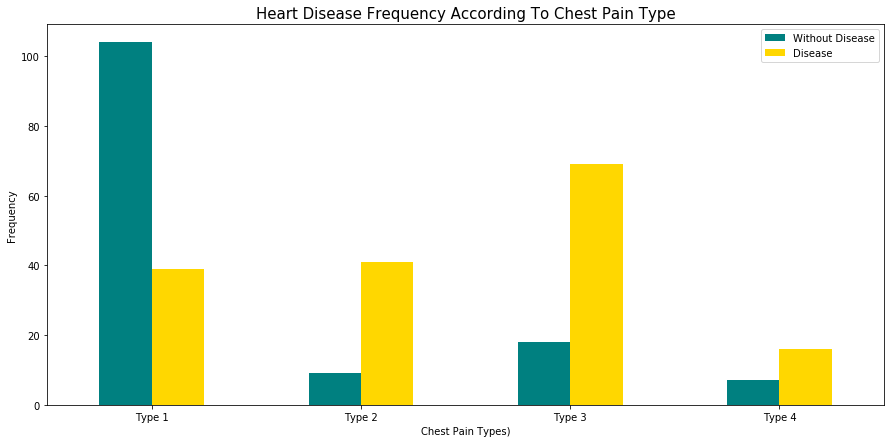

In [17]:
ct= pd.crosstab(df.cp, df.target)
ct.plot(kind="bar", figsize=(15,7), color=['teal','gold'])
plt.title("Heart Disease Frequency According To Chest Pain Type",fontsize=15)
plt.xticks(rotation="horizontal")
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Types)")
plt.xticks([0,1,2,3], ["Type 1", "Type 2", "Type 3", "Type 4"])
plt.legend(["Without Disease", "Disease"],)
plt.show()

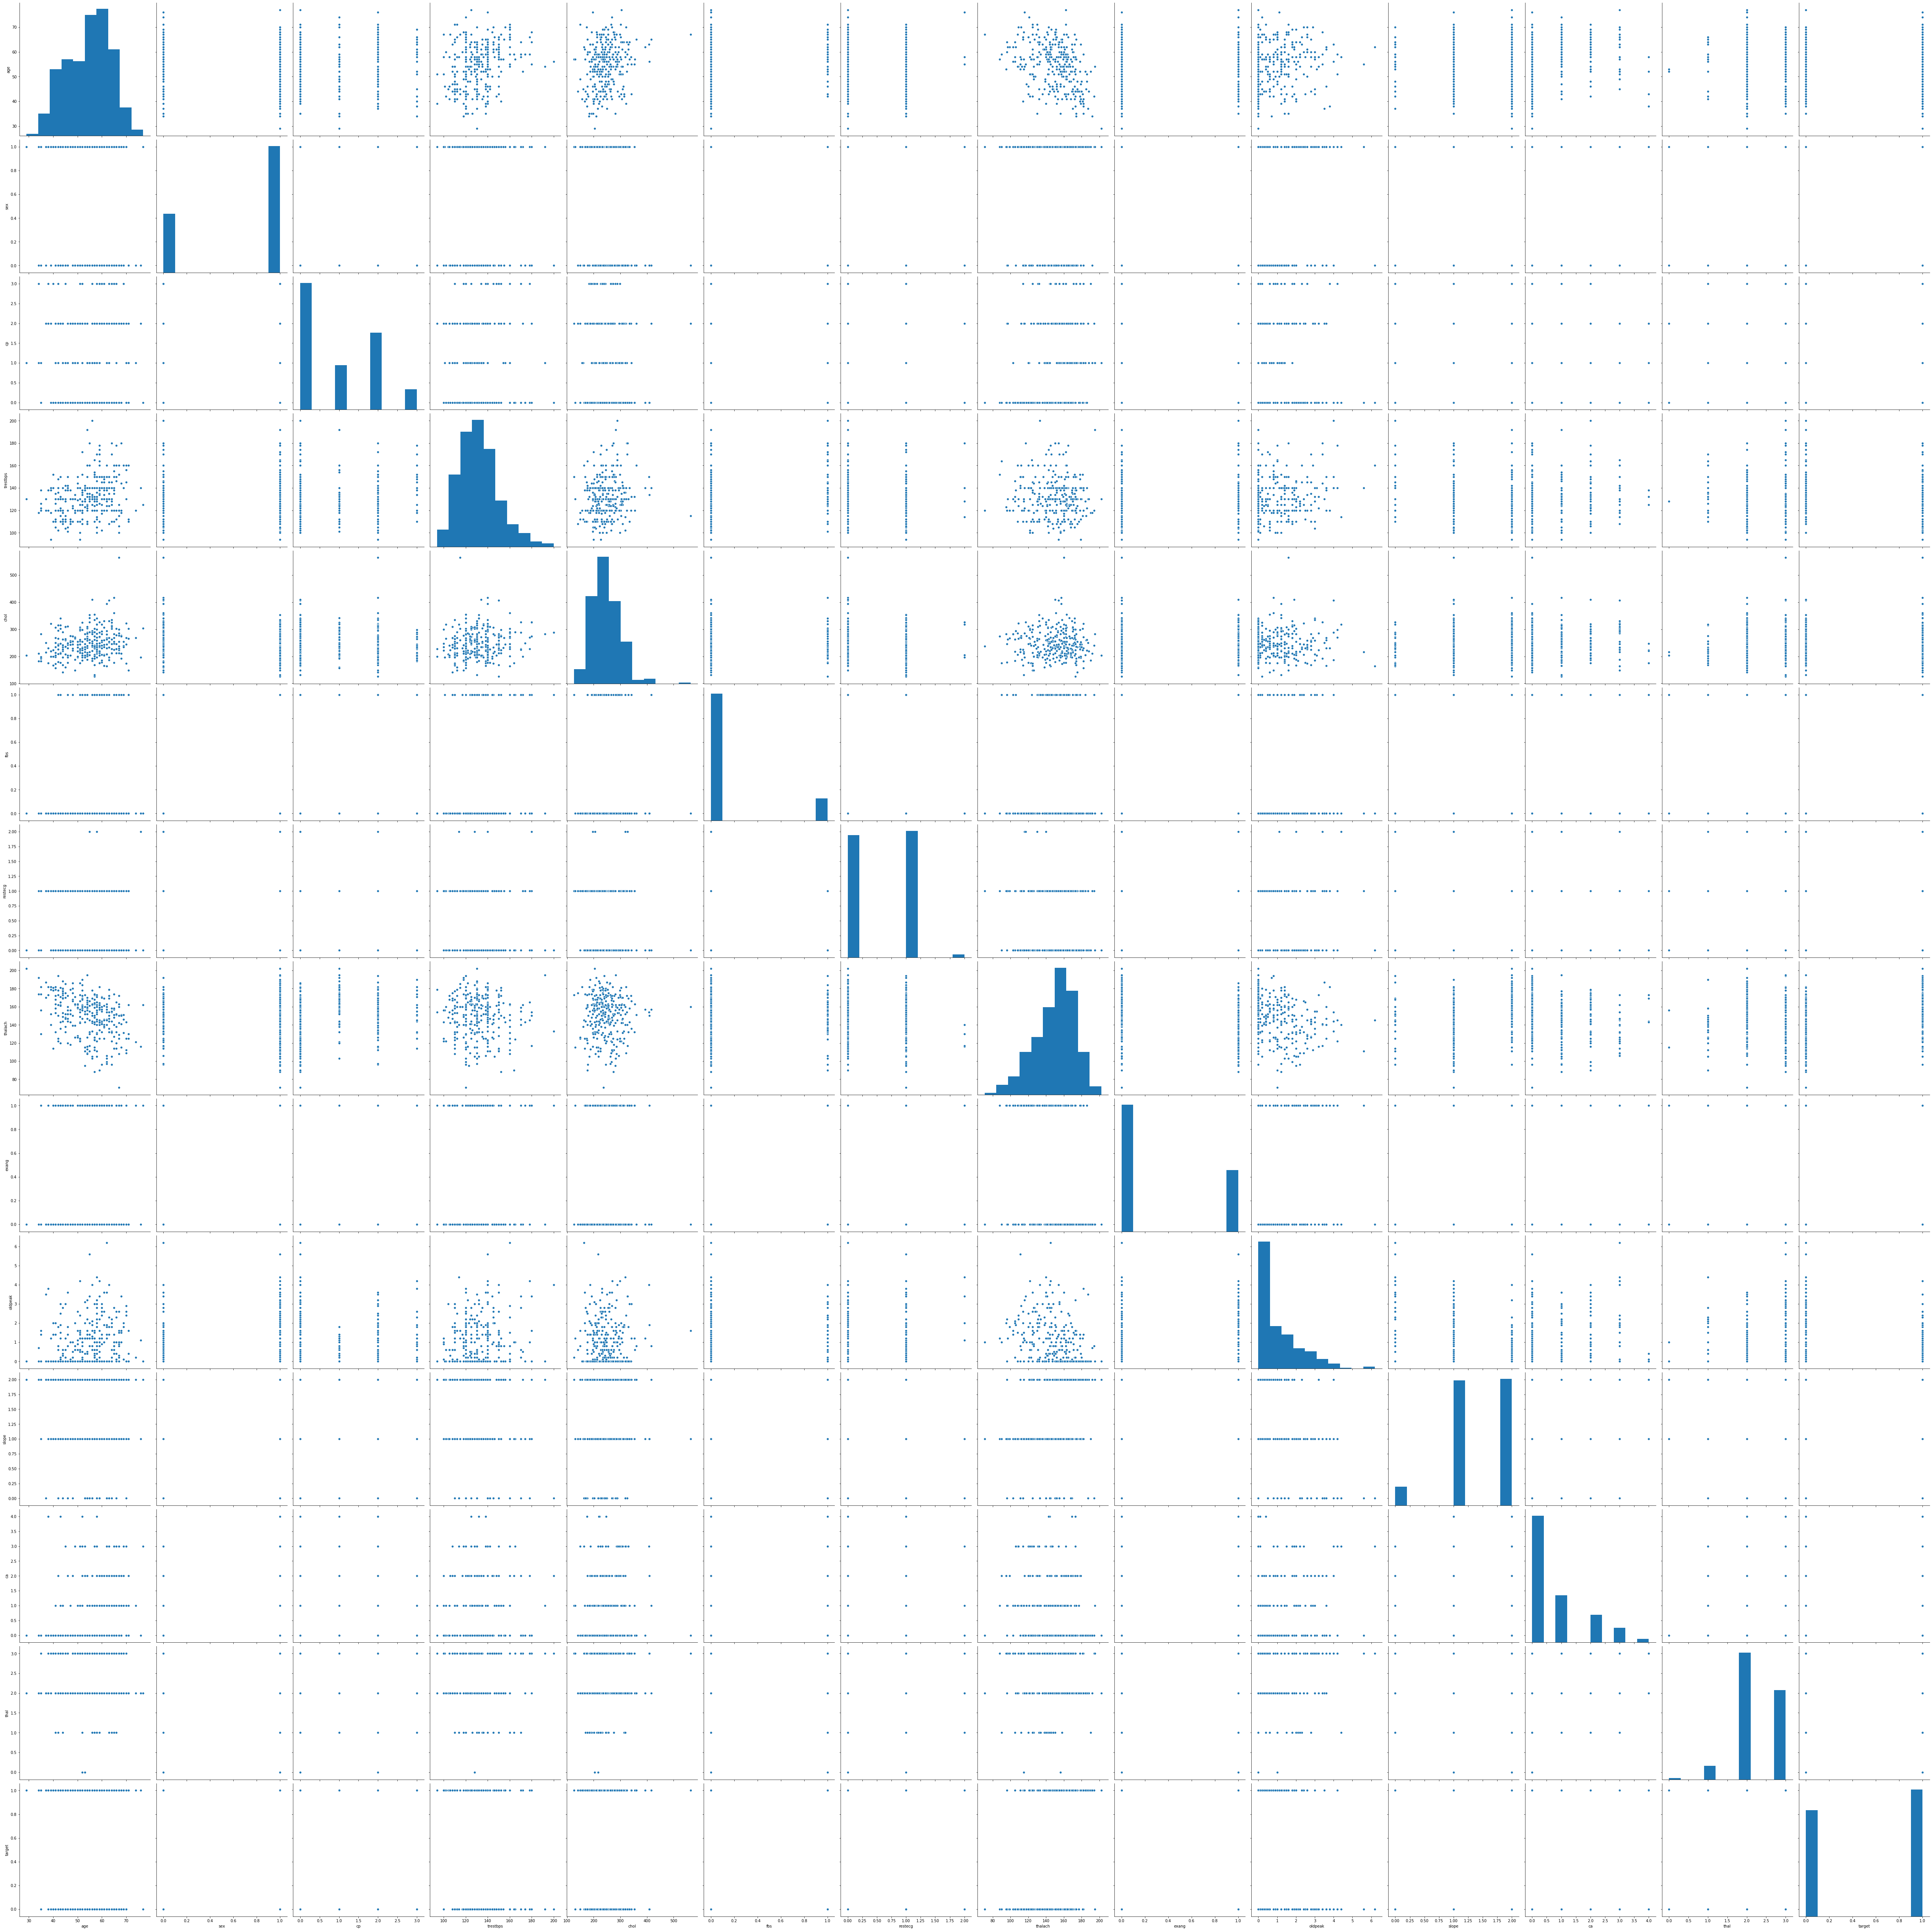

In [18]:
sns.pairplot(df, height=5)

## Ages of people with and wothout diseasee

In [19]:
data = df
t1=[]
t0=[]
for age in data.age.unique():
    t1.append(len(data[(data['age']==age)&(data.target==1)]))
    t0.append(len(data[(data['age']==age)&(data.target==0)]))

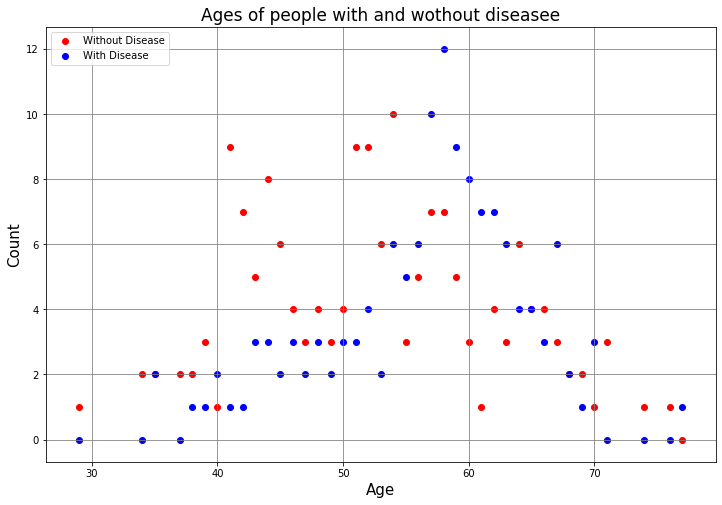

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x=data.age.unique(),y=t1,color='red',label='Without Disease')
plt.scatter(x=data.age.unique(),y=t0,color='blue',label='With Disease')
plt.legend(loc='upper left')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Ages of people with and wothout diseasee', fontsize=17)
plt.grid(c="grey")
plt.show()

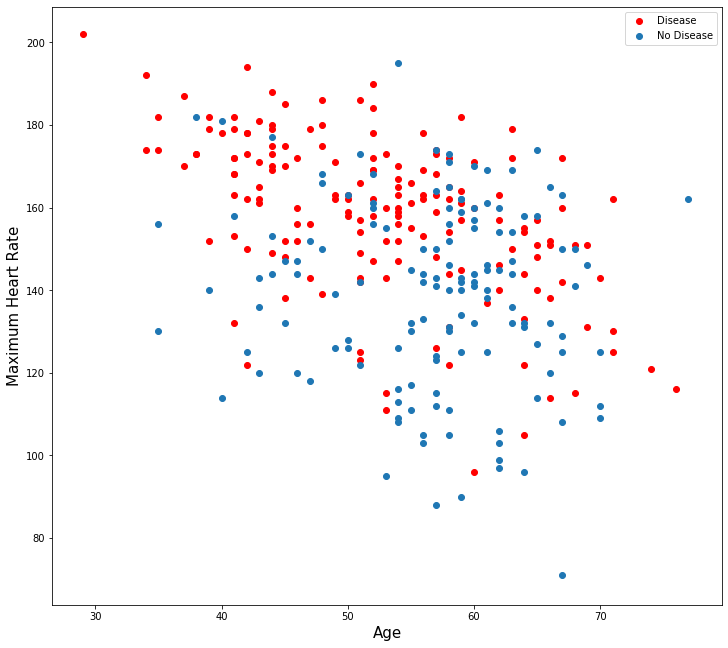

In [21]:
plt.figure(figsize=(12,11))
plt.scatter(x=data.age[df.target==1], y=data.thalach[(df.target==1)], c="red")
plt.scatter(x=data.age[df.target==0], y=data.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age", fontsize=15)
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.show()

In [22]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [23]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [24]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Logistic Regression

In [25]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [26]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [28]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [29]:
accuracies = {}
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


## KNN Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
score=knn.score(x_test.T, y_test.T)*100
print("{} NN Score: {:.2f}%".format(2, score))

2 NN Score: 77.05%


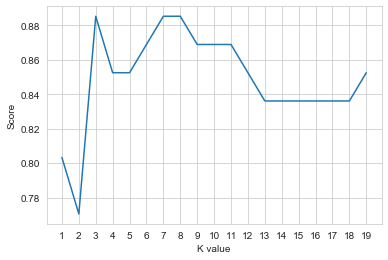

Maximum KNN Score is 88.52%


In [68]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## Support Vector Machine(SVM) 

In [33]:
from sklearn.svm import SVC

In [34]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


## Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt=DecisionTreeClassifier()
dt.fit(x_train.T, y_train.T)
acc = dt.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision tree accuracy is {:.2f}%".format(acc))

Decision tree accuracy is 77.05%


## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)
acc = rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest']= acc
print("Random Forest accuracy is {:.2f}%".format(acc))

Random Forest accuracy is 88.52%


# K-Folds Cross Validation

In [39]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [40]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train.T, y_train.T)
    a=model.score(x_test.T, y_test.T)
    return a*100

In [41]:
from sklearn.model_selection import cross_val_score
yy=df.target
cross_val_score(RandomForestClassifier(), x_data, yy)
cross_l=[]

In [42]:
lg=cross_val_score(LogisticRegression(solver='liblinear', max_iter=400), x_data, yy)
cross_l.append(lg)

In [43]:
kkk=cross_val_score(KNeighborsClassifier(n_neighbors=3), x_data, yy)
cross_l.append(kkk)

In [44]:
sss=cross_val_score(SVC(random_state=1), x_data, yy)
cross_l.append(sss)

In [45]:
gnb=cross_val_score(GaussianNB(), x_data, yy)
cross_l.append(gnb)

In [46]:
ddd=cross_val_score(DecisionTreeClassifier(), x_data, yy)
cross_l.append(ddd)

In [47]:
rrr=cross_val_score(RandomForestClassifier(n_estimators=1000, random_state=1), x_data, yy)
cross_l.append(rrr)

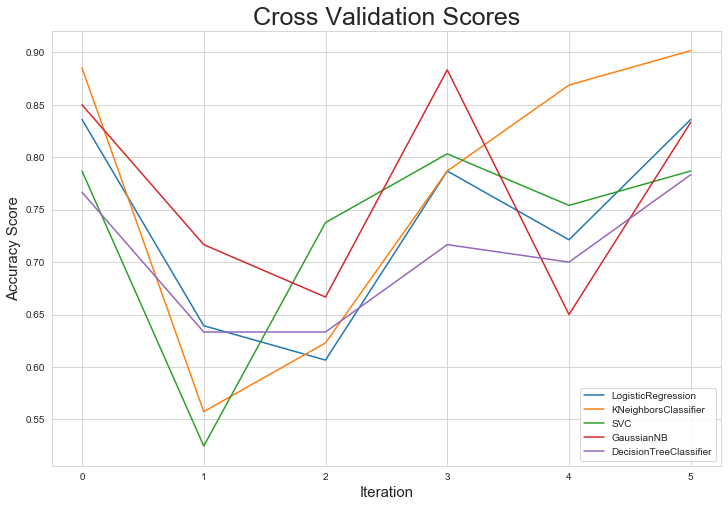

In [69]:
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.plot(cross_l)
plt.legend(["LogisticRegression", 'KNeighborsClassifier', 'SVC', 'GaussianNB', 'DecisionTreeClassifier','RandomForestClassifier'], 
           loc="lower right")
plt.ylabel("Accuracy Score", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.title("Cross Validation Scores",fontsize=25)
plt.show()

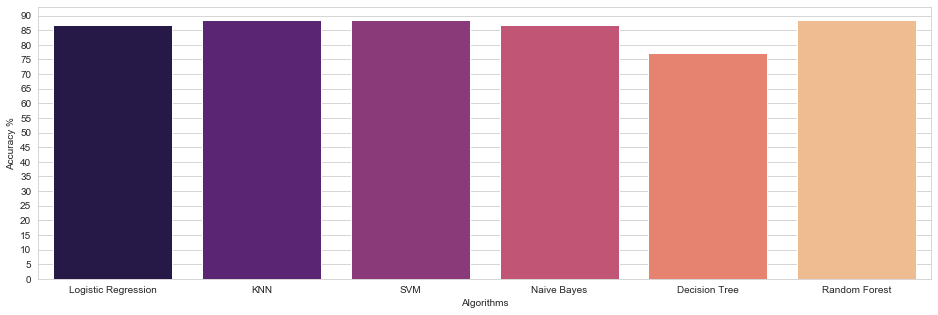

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='magma')
plt.show()

In [50]:
y_pred = rf.predict(x_test.T)

In [51]:
dfpred = pd.DataFrame({'Test values': y_test.T, 'Predicted Values values':y_pred})
dfpred.head(20)

,Test values,Predicted Values values
0,0,0
1,1,1
2,0,1
3,0,0
4,1,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [52]:
predlr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
predknn = knn3.predict(x_test.T)
predsvm = svm.predict(x_test.T)
prednb = nb.predict(x_test.T)
preddt = dt.predict(x_test.T)
predf = rf.predict(x_test.T)

In [53]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,predlr)
cm_knn = confusion_matrix(y_test,predknn)
cm_svm = confusion_matrix(y_test,predsvm)
cm_nb = confusion_matrix(y_test,prednb)
cm_dt = confusion_matrix(y_test,preddt)
cm_rf = confusion_matrix(y_test,predf)

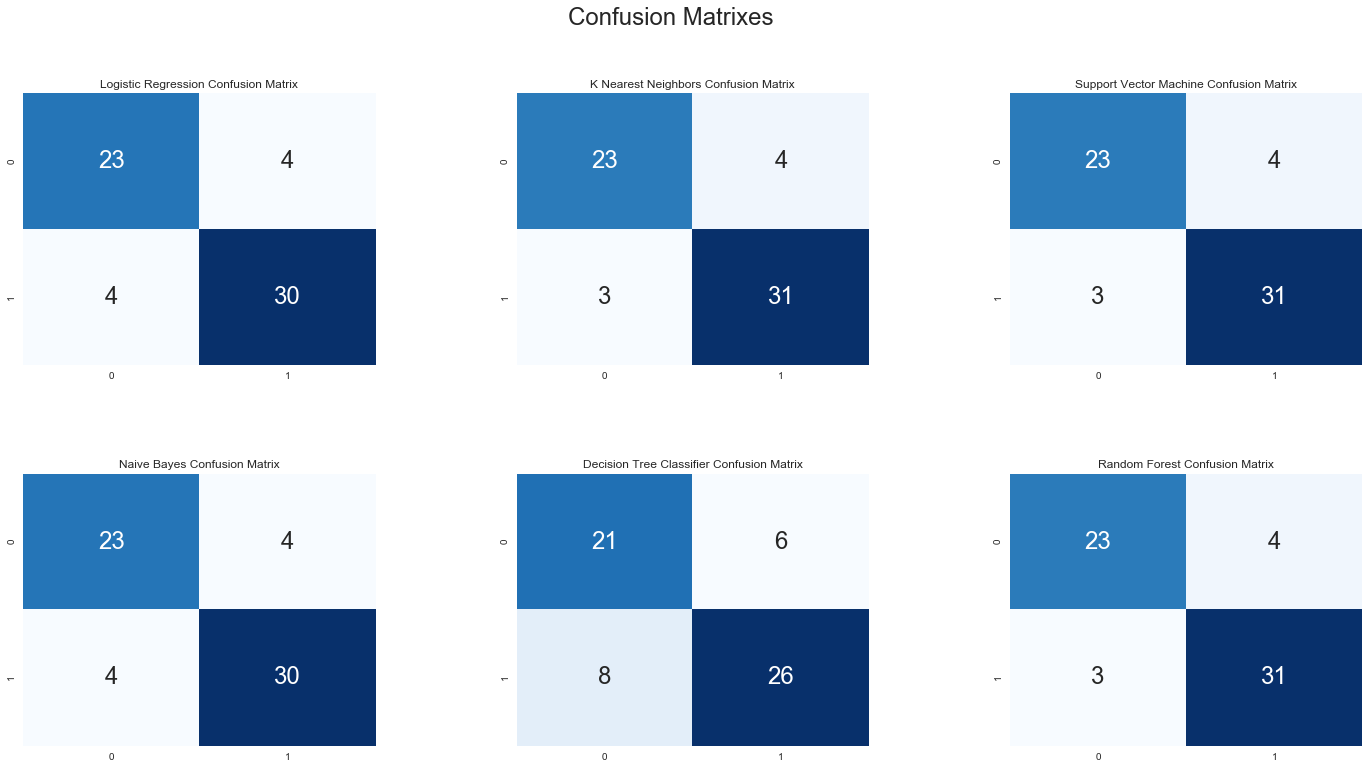

In [54]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

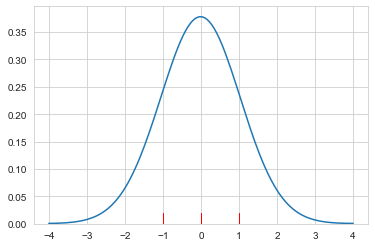

In [72]:
sns.distplot(y_test - y_pred, hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})

In [63]:
### here the graph shows a normal distribution of the predicted and the actual test values.

In [70]:
import pickle
file = open('knn_model.pkl', 'wb')
pickle.dump(knn3, file)